In [1]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# set number of classifications

In [4]:
NUM_CLASSES = 24

# Load learning data


In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
14/17 [=======================>......] - ETA: 0s - loss: 3.1918 - accuracy: 0.0469
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 7s 166ms/step - loss: 3.1909 - accuracy: 0.0483 - val_loss: 3.1623 - val_accuracy: 0.0496
Epoch 2/1000
11/17 [==================>...........] - ETA: 0s - loss: 3.1659 - accuracy: 0.0568
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 26ms/step - loss: 3.1575 - accuracy: 0.0629 - val_loss: 3.1346 - val_accuracy: 0.0865
Epoch 3/1000
 9/17 [==============>...............] - ETA: 0s - loss: 3.1417 - accuracy: 0.0668
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 3.1388 - accuracy: 0.0658 - val_loss: 3.1073 - val_accuracy: 0.1035
Epoch 4/1000
10/17 [================>.............] - ETA: 0s - loss: 3.1142 - accuracy: 0.08

13/17 [=====================>........] - ETA: 0s - loss: 2.2811 - accuracy: 0.2596
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 2.2828 - accuracy: 0.2565 - val_loss: 1.9959 - val_accuracy: 0.4454
Epoch 29/1000
11/17 [==================>...........] - ETA: 0s - loss: 2.2602 - accuracy: 0.2706
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 2.2553 - accuracy: 0.2707 - val_loss: 1.9565 - val_accuracy: 0.4809
Epoch 30/1000
12/17 [====================>.........] - ETA: 0s - loss: 2.2200 - accuracy: 0.2780
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 25ms/step - loss: 2.2305 - accuracy: 0.2797 - val_loss: 1.9248 - val_accuracy: 0.4695
Epoch 31/1000
10/17 [================>.............] - ETA: 0s - loss: 2.2230 - accuracy: 0.2750
Epoch

Epoch 55/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.9444 - accuracy: 0.3600
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 1.9465 - accuracy: 0.3564 - val_loss: 1.4802 - val_accuracy: 0.6638
Epoch 56/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.9620 - accuracy: 0.3388
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.9339 - accuracy: 0.3568 - val_loss: 1.4800 - val_accuracy: 0.6553
Epoch 57/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.9577 - accuracy: 0.3445
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 1.9520 - accuracy: 0.3441 - val_loss: 1.4585 - val_accuracy: 0.6397
Epoch 58/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.9482 - accuracy

Epoch 82/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.7933 - accuracy: 0.4010
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 21ms/step - loss: 1.8080 - accuracy: 0.3947 - val_loss: 1.2961 - val_accuracy: 0.6752
Epoch 83/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.8164 - accuracy: 0.3997
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 1.8111 - accuracy: 0.3942 - val_loss: 1.2964 - val_accuracy: 0.6809
Epoch 84/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.8182 - accuracy: 0.3926
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.8057 - accuracy: 0.3909 - val_loss: 1.2919 - val_accuracy: 0.6780
Epoch 85/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.7831 - accuracy

Epoch 109/1000
10/17 [================>.............] - ETA: 0s - loss: 1.7156 - accuracy: 0.4219
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 1s 52ms/step - loss: 1.7250 - accuracy: 0.4288 - val_loss: 1.1728 - val_accuracy: 0.6993
Epoch 110/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.7093 - accuracy: 0.4375
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 21ms/step - loss: 1.7099 - accuracy: 0.4335 - val_loss: 1.1642 - val_accuracy: 0.6965
Epoch 111/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.7481 - accuracy: 0.4030
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 21ms/step - loss: 1.7431 - accuracy: 0.4075 - val_loss: 1.1626 - val_accuracy: 0.6993
Epoch 112/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.7056 - a

Epoch 136/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.6590 - accuracy: 0.4271
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 21ms/step - loss: 1.6746 - accuracy: 0.4345 - val_loss: 1.0987 - val_accuracy: 0.7234
Epoch 137/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.6910 - accuracy: 0.4297
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.6730 - accuracy: 0.4311 - val_loss: 1.0925 - val_accuracy: 0.7206
Epoch 138/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.6591 - accuracy: 0.4325
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 1s 57ms/step - loss: 1.6783 - accuracy: 0.4378 - val_loss: 1.0885 - val_accuracy: 0.7121
Epoch 139/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.6603 - a

Epoch 163/1000
10/17 [================>.............] - ETA: 0s - loss: 1.6394 - accuracy: 0.4508
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.6450 - accuracy: 0.4586 - val_loss: 1.0455 - val_accuracy: 0.7489
Epoch 164/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.6372 - accuracy: 0.4496
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.6365 - accuracy: 0.4505 - val_loss: 1.0505 - val_accuracy: 0.7447
Epoch 165/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.6315 - accuracy: 0.4453
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 19ms/step - loss: 1.6262 - accuracy: 0.4463 - val_loss: 1.0557 - val_accuracy: 0.7461
Epoch 166/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.6238 - a

Epoch 190/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.5523 - accuracy: 0.4844
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.5774 - accuracy: 0.4714 - val_loss: 0.9985 - val_accuracy: 0.7532
Epoch 191/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.6449 - accuracy: 0.4507
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.6240 - accuracy: 0.4591 - val_loss: 1.0096 - val_accuracy: 0.7773
Epoch 192/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.5278 - accuracy: 0.4785
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.5554 - accuracy: 0.4723 - val_loss: 0.9975 - val_accuracy: 0.7773
Epoch 193/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.5655 - a

Epoch 217/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.5661 - accuracy: 0.4780
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.5394 - accuracy: 0.4884 - val_loss: 0.9803 - val_accuracy: 0.7972
Epoch 218/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.5222 - accuracy: 0.4879
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.5427 - accuracy: 0.4865 - val_loss: 0.9723 - val_accuracy: 0.8142
Epoch 219/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.5633 - accuracy: 0.4744
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 19ms/step - loss: 1.5511 - accuracy: 0.4770 - val_loss: 0.9597 - val_accuracy: 0.8071
Epoch 220/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.5663 - a

Epoch 244/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.5268 - accuracy: 0.4837
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 1.5059 - accuracy: 0.4927 - val_loss: 0.9584 - val_accuracy: 0.8227
Epoch 245/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.5263 - accuracy: 0.4742
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 1.5393 - accuracy: 0.4766 - val_loss: 0.9448 - val_accuracy: 0.8270
Epoch 246/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.4745 - accuracy: 0.5021
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 21ms/step - loss: 1.5137 - accuracy: 0.4832 - val_loss: 0.9329 - val_accuracy: 0.8255
Epoch 247/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.5505 - a

Epoch 271/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.5036 - accuracy: 0.5020
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 1.5035 - accuracy: 0.5054 - val_loss: 0.9303 - val_accuracy: 0.8326
Epoch 272/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.5176 - accuracy: 0.4785
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 19ms/step - loss: 1.4952 - accuracy: 0.4865 - val_loss: 0.9309 - val_accuracy: 0.8270
Epoch 273/1000
14/17 [=======================>......] - ETA: 0s - loss: 1.5086 - accuracy: 0.5039
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 1s 43ms/step - loss: 1.4955 - accuracy: 0.5054 - val_loss: 0.9221 - val_accuracy: 0.8355
Epoch 274/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.4922 - a

Epoch 298/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.4787 - accuracy: 0.4993
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.4844 - accuracy: 0.4969 - val_loss: 0.9155 - val_accuracy: 0.8270
Epoch 299/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.5040 - accuracy: 0.4879
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.4872 - accuracy: 0.4965 - val_loss: 0.9151 - val_accuracy: 0.8241
Epoch 300/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.4286 - accuracy: 0.5376
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.4423 - accuracy: 0.5305 - val_loss: 0.9124 - val_accuracy: 0.8241
Epoch 301/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.4721 - a

Epoch 325/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.4848 - accuracy: 0.4893
Epoch 325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 1.4799 - accuracy: 0.4870 - val_loss: 0.9146 - val_accuracy: 0.8213
Epoch 326/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.5575 - accuracy: 0.4879
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 16ms/step - loss: 1.5239 - accuracy: 0.4908 - val_loss: 0.9143 - val_accuracy: 0.8227
Epoch 327/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.5113 - accuracy: 0.4934
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.4875 - accuracy: 0.5017 - val_loss: 0.9110 - val_accuracy: 0.8199
Epoch 328/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.4266 - a

Epoch 352/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.4670 - accuracy: 0.4936
Epoch 352: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.4745 - accuracy: 0.4979 - val_loss: 0.8856 - val_accuracy: 0.8298
Epoch 353/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.4762 - accuracy: 0.5150
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.4914 - accuracy: 0.5135 - val_loss: 0.8861 - val_accuracy: 0.8227
Epoch 354/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.4860 - accuracy: 0.5111
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 21ms/step - loss: 1.5002 - accuracy: 0.5012 - val_loss: 0.8819 - val_accuracy: 0.8213
Epoch 355/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.4683 - a

Epoch 379/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.4511 - accuracy: 0.5090
Epoch 379: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 18ms/step - loss: 1.4388 - accuracy: 0.5125 - val_loss: 0.8962 - val_accuracy: 0.8170
Epoch 380/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.4647 - accuracy: 0.5189
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 1s 33ms/step - loss: 1.4738 - accuracy: 0.5083 - val_loss: 0.8841 - val_accuracy: 0.8227
Epoch 381/1000
11/17 [==================>...........] - ETA: 0s - loss: 1.4306 - accuracy: 0.5320
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 20ms/step - loss: 1.4360 - accuracy: 0.5263 - val_loss: 0.8677 - val_accuracy: 0.8383
Epoch 382/1000
12/17 [====================>.........] - ETA: 0s - loss: 1.4146 - a

In [13]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 5ms/step - loss: 0.8732 - accuracy: 0.8170


In [14]:
# Loading saved models
model = tf.keras.models.load_model(model_save_path)

In [15]:
# reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 325ms/step
[8.0910401e-04 3.4563459e-02 5.1150132e-02 6.3032378e-05 1.1998368e-06
 2.4568262e-05 5.0494503e-02 2.8896438e-05 5.2180522e-09 2.5311197e-04
 8.8114415e-05 4.3732969e-05 5.1940526e-05 2.2525173e-02 3.1200375e-03
 9.9647320e-07 4.8546289e-04 8.2137543e-05 3.5731627e-08 4.5440631e-04
 4.2053196e-04 7.4753433e-01 1.2017784e-07 8.7805077e-02]
21


In [16]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# confusion matrix

23/23 [==============================] - 0s 3ms/step


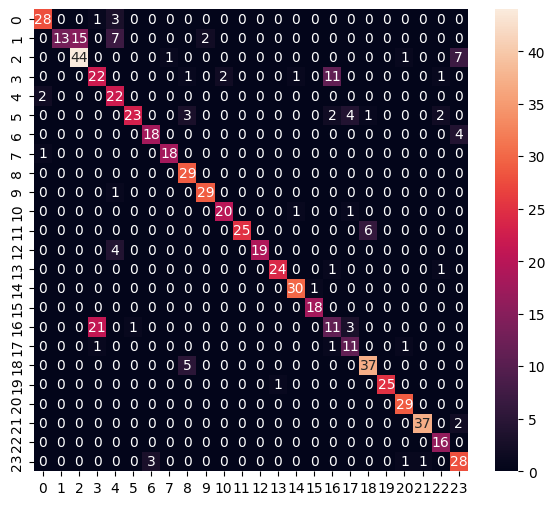

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       1.00      0.35      0.52        37
           2       0.75      0.83      0.79        53
           3       0.49      0.58      0.53        38
           4       0.59      0.92      0.72        24
           5       0.96      0.66      0.78        35
           6       0.86      0.82      0.84        22
           7       0.95      0.95      0.95        19
           8       0.76      1.00      0.87        29
           9       0.94      0.97      0.95        30
          10       0.91      0.91      0.91        22
          11       1.00      0.81      0.89        31
          12       1.00      0.83      0.90        23
          13       0.96      0.92      0.94        26
          14       0.94      0.97      0.95        31
          15       0.95      1.00      0.97        18
          16       0.42      0.31      0.35        36
     

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert model to Tensorflow-Lite 

In [18]:
# Save as inference-only model
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform (quantize) the model
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\sonam\AppData\Local\Temp\tmprvl8jk_w\assets


INFO:tensorflow:Assets written to: C:\Users\sonam\AppData\Local\Temp\tmprvl8jk_w\assets


7424

# reasoning test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference execution
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.0910302e-04 3.4563392e-02 5.1150057e-02 6.3032516e-05 1.1998393e-06
 2.4568340e-05 5.0494421e-02 2.8896533e-05 5.2180837e-09 2.5311232e-04
 8.8114444e-05 4.3733027e-05 5.1940537e-05 2.2525202e-02 3.1200440e-03
 9.9647730e-07 4.8546353e-04 8.2137638e-05 3.5731841e-08 4.5440777e-04
 4.2053204e-04 7.4753457e-01 1.2017857e-07 8.7804876e-02]
21
